In [1]:
#Importing needed libraries 
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
#Comment the line below if you want interactive plots
pio.renderers.default = "jpeg"

In [2]:
#Importing data
url = 'https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [3]:
#Lets see if it works.
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

150 rows and 6 columns 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

no Nans

In [7]:
df.duplicated().sum()

0

no Duplicates 

In [8]:
#Since we are using kMeans we need to know the number of clusters, 

#First a quick data selection
X = df.iloc[:, [1, 2, 3, 4]].values

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 300, 
                    n_init = 10, 
                    random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

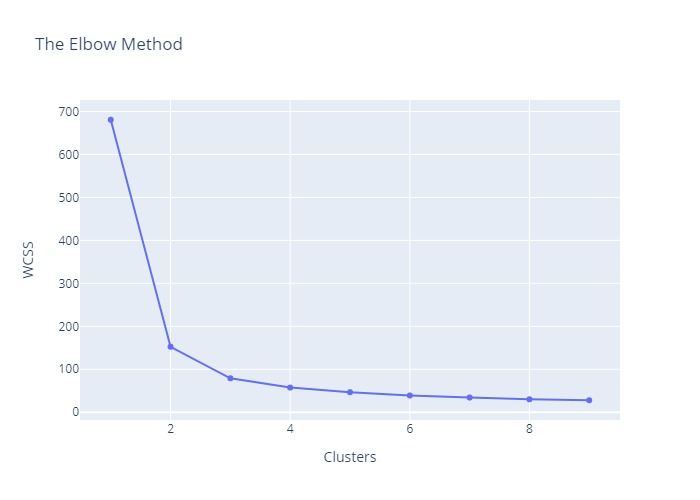

In [10]:
#The Elbow Method plot
fig = go.Figure(data = go.Scatter(x = np.arange(1,11), y = wcss))
fig.update_layout(title='The Elbow Method',
                   xaxis_title='Clusters',
                   yaxis_title='WCSS')
fig.show()

In [11]:
#As per the above figure, the best number of clusters is 3
#Lets apply the above
kmeans = KMeans(n_clusters = 3, 
                init = 'k-means++',
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)
y_kmeans = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

In [12]:
#Lets add our findings from above to a new column in a new df
df2 = df.copy()
df2['Cluster'] = y_kmeans

In [13]:
df2.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1


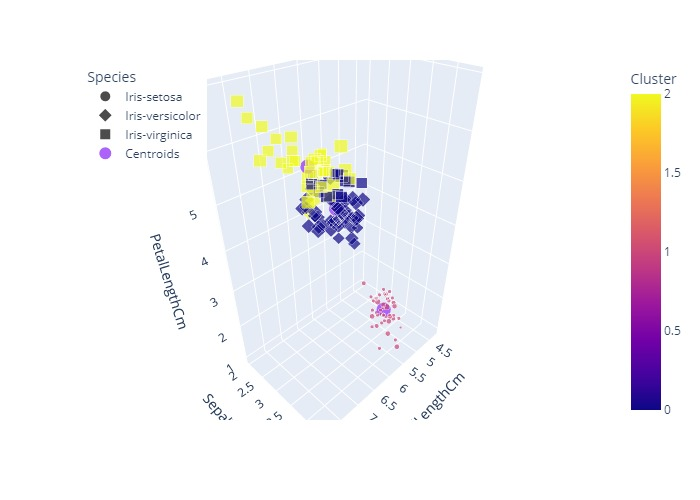

In [14]:
#Lets plot our new findings
fig = px.scatter_3d(df2, 
                    x ='SepalLengthCm', 
                    y='SepalWidthCm', 
                    z='PetalLengthCm', 
                    size='PetalWidthCm',
                    color='Cluster', 
                    hover_name='Id',
                    symbol='Species',
                   )
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01)
                 )
fig.add_scatter3d(x=centers[:,0],y=centers[:,1],z=centers[:,2],mode='markers',name='Centroids')
fig.show()